# Ｒによるデータ分析・可視化

### ライブラリの読み込み
```dplyr```を用いたデータ分析と，```ggplot2```を用いたデータの可視化を行うためのライブラリの読み込み


In [2]:
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### データセットの利用のためのパッケージの読み込み

In [1]:
install.packages("Lahman")
library("Lahman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### データセット
Lahmanパッケージに含まれるデータセットの例

|  変数（データ）名  |    |
| ---- | ---- |
|  People  | プレイヤーに関するデータ  |
|  Batting | シーズンの打撃成績 |
|  Fielding | シーズンの守備成績 |
|  Pitching | シーズンの投球成績 |
|  Salaries | プレイヤーの各シーズンの年俸 |
|  Teams | シーズンごとのチーム成績 |

上記以外のデータや，データセットの詳細については，以下を参照のこと．

http://www.seanlahman.com/files/database/readme2017.txt

例えば，Peopleデータセットを表示すると

In [ ]:
head(People)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,⋯,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,deathDate,birthDate
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<date>,<date>
1,aardsda01,1981,12,27,USA,CO,Denver,NA,NA,NA,⋯,215,75,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,NA,1981-12-27
2,aaronha01,1934,2,5,USA,AL,Mobile,NA,NA,NA,⋯,180,72,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,NA,1934-02-05
3,aaronto01,1939,8,5,USA,AL,Mobile,1984,8,16,⋯,190,75,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,1984-08-16,1939-08-05
4,aasedo01,1954,9,8,USA,CA,Orange,NA,NA,NA,⋯,190,75,R,R,1977-07-26,1990-10-03,aased001,aasedo01,NA,1954-09-08
5,abadan01,1972,8,25,USA,FL,Palm Beach,NA,NA,NA,⋯,184,73,L,L,2001-09-10,2006-04-13,abada001,abadan01,NA,1972-08-25
6,abadfe01,1985,12,17,D.R.,La Romana,La Romana,NA,NA,NA,⋯,220,73,L,L,2010-07-28,2019-09-28,abadf001,abadfe01,NA,1985-12-17


### データ操作の例
Peopleデータセットから，nameLastが"Suzuki"の行（プレイヤー）を抽出する．

In [ ]:
People %>% dplyr::filter(nameLast == "Suzuki")

playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,⋯,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,deathDate,birthDate
<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<date>,<date>
suzukic01,1973,10,22,Japan,Aichi,Nichi Kasugai-gun,NA,NA,NA,⋯,175,71,L,R,2001-04-02,2019-03-21,suzui001,suzukic01,NA,1973-10-22
suzukku01,1983,10,4,USA,HI,Wailuku,NA,NA,NA,⋯,210,71,R,R,2007-06-12,2019-09-29,suzuk001,suzukku01,NA,1983-10-04
suzukma01,1975,5,31,Japan,Hyogo,Kobe,NA,NA,NA,⋯,195,75,R,R,1996-07-07,2002-06-28,suzum001,suzukma01,NA,1975-05-31


Peopleデータセットから，nameLastが"Suzuki"の行（プレイヤー）を抽出し，playerID, nameFirst, nameLastの３つの列を抽出する．

といったように，```%>%```でつなぐことで，処理を追加していくことができる．

In [ ]:
People %>% dplyr::filter(nameLast == "Suzuki") %>% select(nameFirst, nameLast, playerID)

nameFirst,nameLast,playerID
<chr>,<chr>,<chr>
Ichiro,Suzuki,suzukic01
Kurt,Suzuki,suzukku01
Mac,Suzuki,suzukma01


イチローの```playerID```が```suzukic01```であることがわかったので，それを用いて，```Batting```データからイチローのデータを抽出してみる．結果を```ichiro_batting```に代入する．以下のどちらでもよい．

In [ ]:
ichiro_data <- Batting %>% dplyr::filter(playerID == "suzukic01")
Batting %>% dplyr::filter(playerID == "suzukic01") -> ichiro_data

In [ ]:
ichiro_data

playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,⋯,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
suzukic01,2001,1,SEA,AL,157,692,127,242,34,⋯,69,56,14,30,53,10,8,4,4,3
suzukic01,2002,1,SEA,AL,157,647,111,208,27,⋯,51,31,15,68,62,27,5,3,5,8
suzukic01,2003,1,SEA,AL,159,679,111,212,29,⋯,62,34,8,36,69,7,6,3,1,3
suzukic01,2004,1,SEA,AL,161,704,101,262,24,⋯,60,36,11,49,63,19,4,2,3,6
suzukic01,2005,1,SEA,AL,162,679,111,206,21,⋯,68,33,8,48,66,23,4,2,6,5
suzukic01,2006,1,SEA,AL,161,695,110,224,20,⋯,49,45,2,49,71,16,5,1,2,2
suzukic01,2007,1,SEA,AL,161,678,111,238,22,⋯,68,37,8,49,77,13,3,4,2,7
suzukic01,2008,1,SEA,AL,162,686,103,213,20,⋯,42,43,4,51,65,12,5,3,4,8
suzukic01,2009,1,SEA,AL,146,639,88,225,31,⋯,46,26,9,32,71,15,4,2,1,1


ヒット数（```H```）が200以上のシーズンを取り出すと

In [ ]:
ichiro_data %>% dplyr::filter(H>200)

playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,⋯,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
suzukic01,2001,1,SEA,AL,157,692,127,242,34,⋯,69,56,14,30,53,10,8,4,4,3
suzukic01,2002,1,SEA,AL,157,647,111,208,27,⋯,51,31,15,68,62,27,5,3,5,8
suzukic01,2003,1,SEA,AL,159,679,111,212,29,⋯,62,34,8,36,69,7,6,3,1,3
suzukic01,2004,1,SEA,AL,161,704,101,262,24,⋯,60,36,11,49,63,19,4,2,3,6
suzukic01,2005,1,SEA,AL,162,679,111,206,21,⋯,68,33,8,48,66,23,4,2,6,5
suzukic01,2006,1,SEA,AL,161,695,110,224,20,⋯,49,45,2,49,71,16,5,1,2,2
suzukic01,2007,1,SEA,AL,161,678,111,238,22,⋯,68,37,8,49,77,13,3,4,2,7
suzukic01,2008,1,SEA,AL,162,686,103,213,20,⋯,42,43,4,51,65,12,5,3,4,8
suzukic01,2009,1,SEA,AL,146,639,88,225,31,⋯,46,26,9,32,71,15,4,2,1,1


### データの集計の例
プレイヤーごとの安打数を集計し，安打数の多い順に表示する

In [ ]:
Batting %>% group_by(playerID) %>% 
            summarise(tH=sum(H)) %>%
            arrange(desc(tH)) -> totalH
head(totalH)

`summarise()` ungrouping output (override with `.groups` argument)



playerID,tH
<chr>,<int>
rosepe01,4256
cobbty01,4189
aaronha01,3771
musiast01,3630
speaktr01,3514
jeterde01,3465


シーズンごとの安打数を集計する場合は，

In [ ]:
Batting %>% group_by(yearID) %>% 
            summarise(tH=sum(H)) -> yearH
yearH %>% dplyr::filter(yearID>2000)

`summarise()` ungrouping output (override with `.groups` argument)



yearID,tH
<int>,<int>
2001,43879
2002,43272
2003,44057
2004,44522
2005,43991
2006,45073
2007,44977
2008,43972
2009,43524


### グラフの描画（散布図）
イチローのシーズンごとの安打数を散布図で描画する．
（横軸：年```yearID```, 縦軸：安打数```H```）

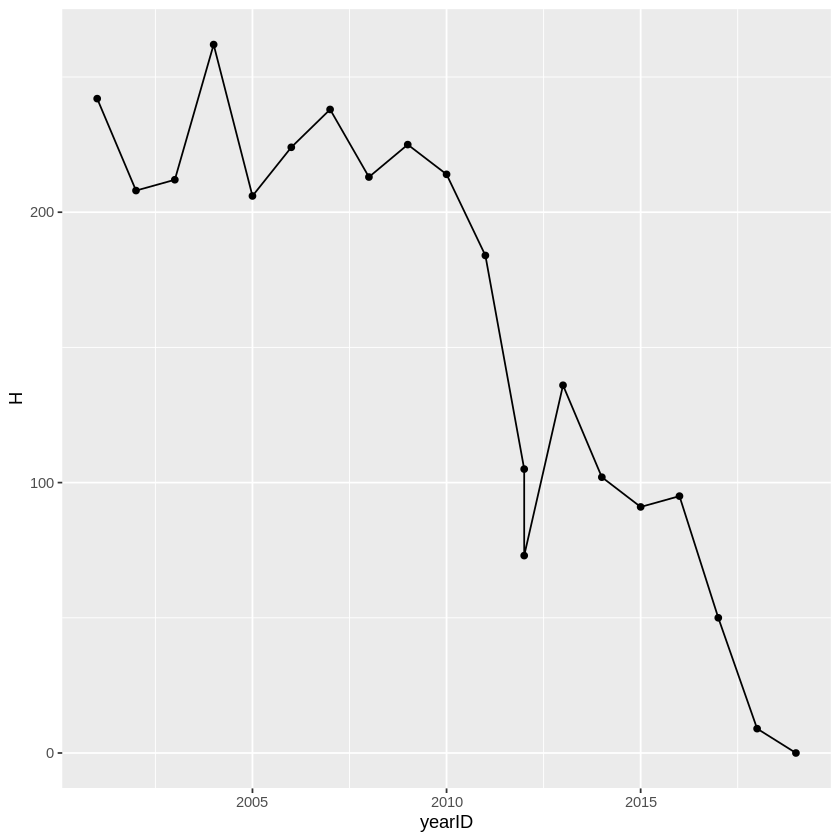

In [ ]:
ggplot(ichiro_data, aes(x=yearID, y=H)) + geom_point() + geom_line()

縦軸を打率にする
（縦軸を```H（安打数）/AB（打数）```に変更）．

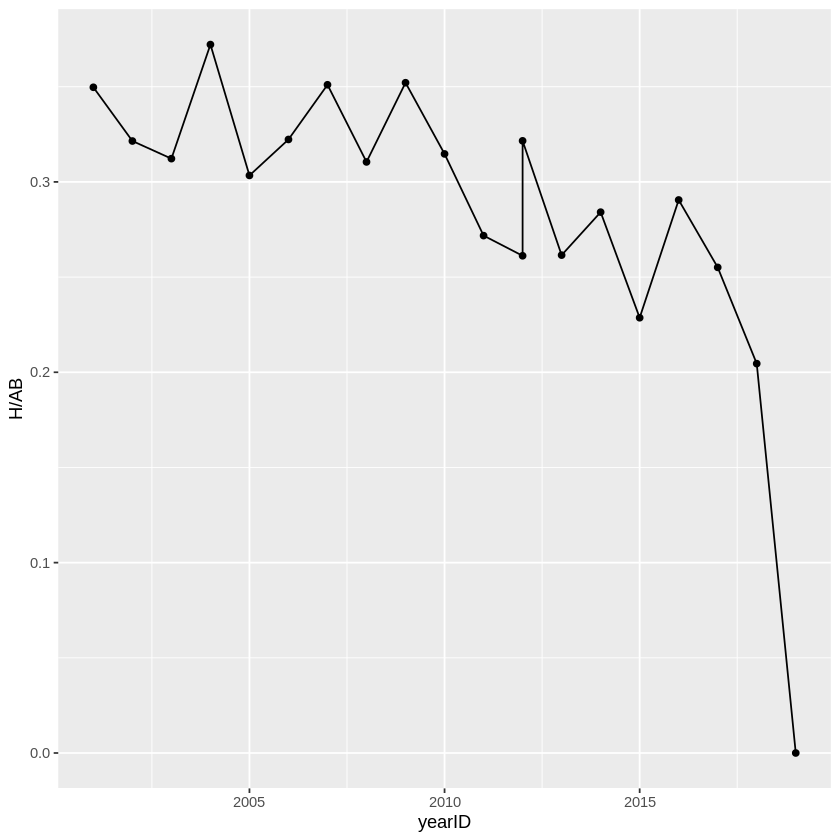

In [ ]:
ggplot(ichiro_data, aes(x=yearID, y=H/AB)) + geom_point() + geom_line()

### グラフの描画（棒グラフ）
イチローのシーズンごとの安打数を棒グラフで描画する．
（横軸：年```yearID```, 縦軸：安打数```H```）

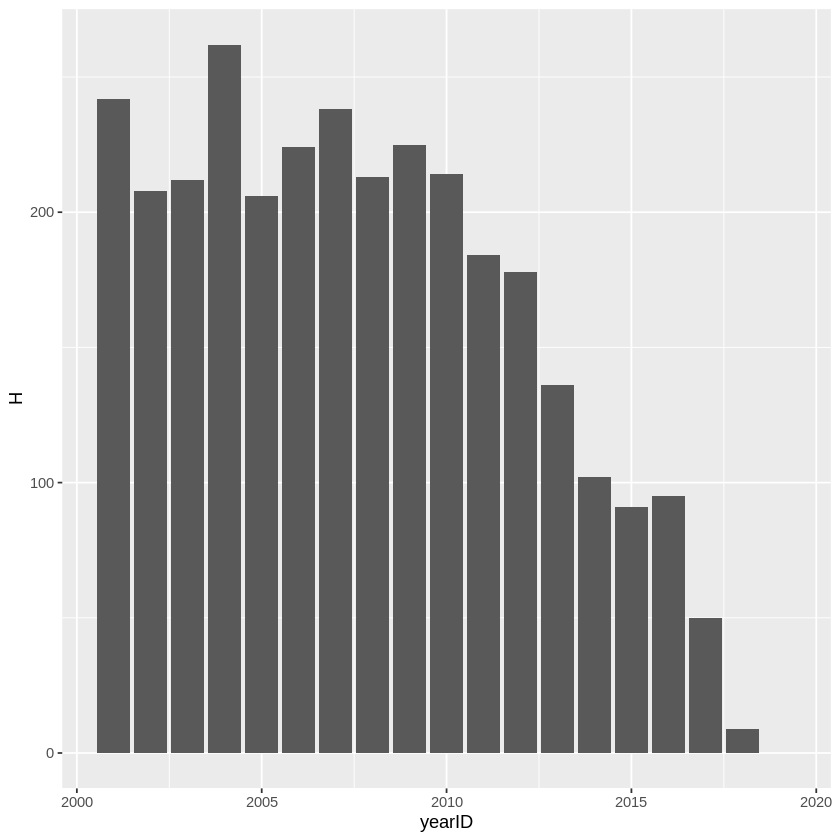

In [ ]:
ggplot(ichiro_data, aes(x=yearID, y=H)) + geom_bar(stat = "identity")

### グラフの描画（ヒストグラム）
2016年シーズンの年俸のヒストグラムを描画する．

まず，2016年の年俸データを抽出する．

In [ ]:
salaries2016 <- Salaries %>% dplyr::filter(yearID==2016)
head(salaries2016)

,yearID,teamID,lgID,playerID,salary
,<int>,<fct>,<fct>,<chr>,<int>
1,2016,ARI,NL,ahmedni01,521600
2,2016,ARI,NL,barreja01,507500
3,2016,ARI,NL,brachsi01,509300
4,2016,ARI,NL,britoso01,508500
5,2016,ARI,NL,castiwe01,3700000
6,2016,ARI,NL,chafian01,519700


ヒストグラムを描画する．
ここでは，X軸・Y軸のメモリ・ラベルのフォントサイズを大きくしている．

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



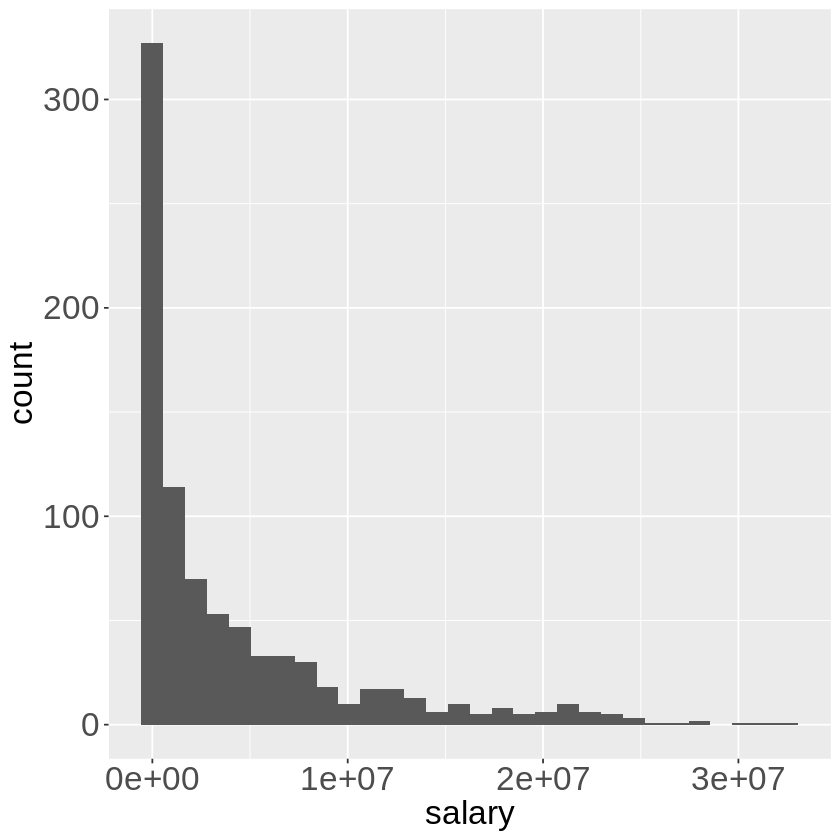

In [ ]:
ggplot(salaries2016, aes(x=salary)) +geom_histogram() + 
theme(axis.title.x = element_text(size=20), axis.title.y = element_text(size=20), axis.text.x = element_text(size=20),axis.text.y = element_text(size=20)) 